In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.gaussian_process import GaussianProcessClassifier

In [85]:
df = pd.read_csv(r'MovingFree.csv')
east = df['.UTM_easting']
north = df['.UTM_northing']
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))
df[".UTM_easting"] = (df[".UTM_easting"] - 328100)
df[".UTM_northing"] = (df[".UTM_northing"] - 4689400)
print (df)

10.394029839617449
10.467083008789489
upper bound : 16.85377562942449
mean: 328131.989697524
lower bound : 17.35120121948421
None
upper bound : 17.221141862682998
mean: 4689457.021927589
lower bound : 17.897656904533505
None
                           time  .Header.seq  .Header.stamp.secs  \
0    2022/10/06/19:00:50.026656            0               82850   
1    2022/10/06/19:00:51.004942            0               82851   
2    2022/10/06/19:00:52.031633            0               82852   
3    2022/10/06/19:00:53.006680            0               82853   
4    2022/10/06/19:00:54.026839            0               82854   
..                          ...          ...                 ...   
206  2022/10/06/19:04:15.999398            0               83056   
207  2022/10/06/19:04:17.024821            0               83057   
208  2022/10/06/19:04:18.004418            0               83058   
209  2022/10/06/19:04:19.029738            0               83059   
210  2022/10/06/19:04:20.00

In [75]:
east = df['.UTM_easting']
north = df['.UTM_northing']
alt = df['.Altitude']
time = df['.Header.stamp.secs']
mean1 = np.mean(df['.UTM_easting'])
mean2 = np.mean(df['.UTM_northing'])
print(mean1)
print(mean2)

31.989697523987235
57.02192758855308


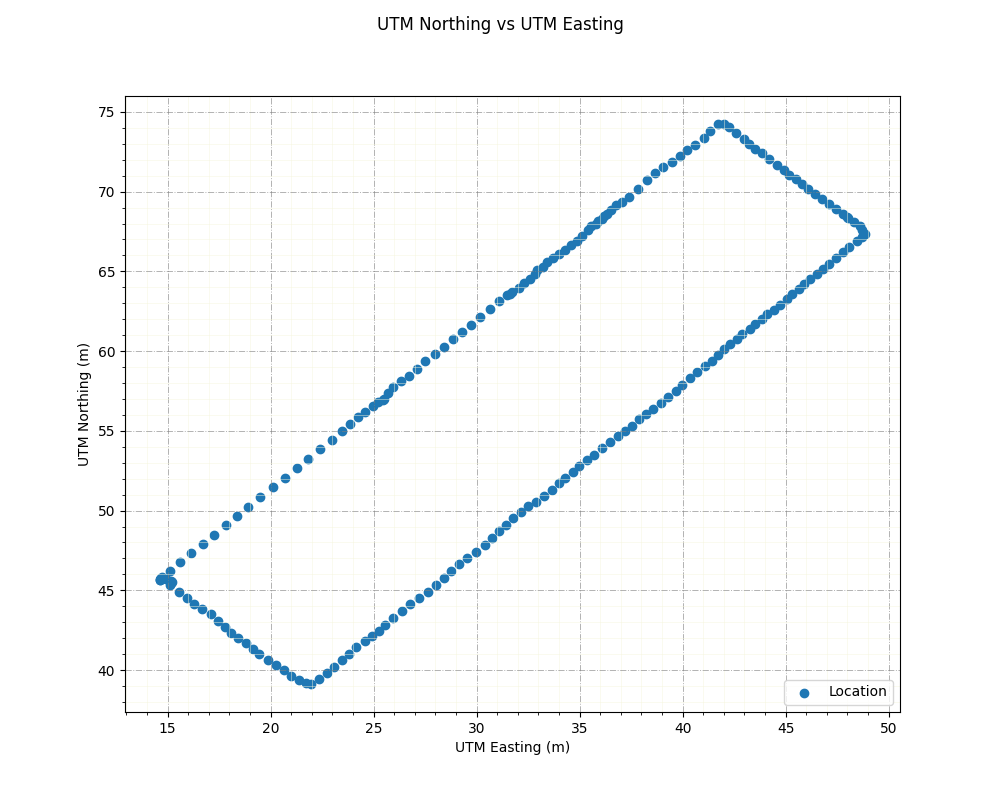

In [81]:
fig = plt.figure()
ax = plt.axes()
fig.suptitle('UTM Northing vs UTM Easting', fontsize=12)
circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)
one = ax.scatter(east, north, label='Location')
#two = ax.scatter(mean1,mean2, label='Mean')
plt.legend(handles=[one], loc='lower right')
plt.xlabel('UTM Easting (m)', fontsize=10)
plt.ylabel('UTM Northing (m)', fontsize=10)
#major grid lines
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=0.7)
#minor grid lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='beige', alpha=0.8, ls='-', lw=0.4)
plt.show()

In [77]:

px.scatter_3d(df, x='.UTM_easting', y='.UTM_northing', z='.Altitude', size_max=18, opacity=0.7)

In [83]:
def rsme (column_name):
 column = np.mean(column_name)
 column_rsme = np.sqrt(np.square(column_name - column).mean())
 return column_rsme

In [84]:
def error_bounds (column_name):
 column=df[column_name].tolist()
 mean = np.mean(column) 
 u = max(column) - np.mean(column)
 l = np.mean(column)  - min(column)
 print(f'upper bound : {u}')
 print(f'mean: {mean}')
 print(f'lower bound : {l}')

In [86]:
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))

10.394029839617449
10.467083008789489
upper bound : 16.85377562943442
mean: 31.989697523987235
lower bound : 17.35120121947428
None
upper bound : 17.221141862749207
mean: 57.02192758855308
lower bound : 17.897656904467297
None
